NEW
<br>XEndList.nunique(0)#以整数int形式返回唯一元素的数量

QUS
<br>怎么获取索引列表？XUniqueList.index获取的并不是一个列表，这里暂用IndexList=XEndList.unique()IndexList.sort()替代

PRO
<br>为什么只有ax才能画legend而plot不行
<br>与标准的整体分布函数比较scipy.stats.norm

待读
<br>scipy.stats.norm.pdf

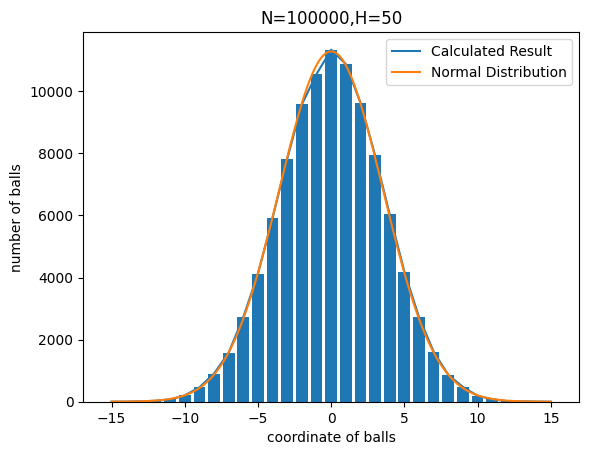

In [16]:
import numpy as np
import pandas as pd
H,N=50,100000
# H,N=int(1e2),int(1e5)#H是下落高度,相当于是纵向钉子的个数,N是下落的小球个数(或者说是实验次数)
MatSize=[H,N]
MatDeltaX=np.random.choice([-0.5,0.5],MatSize)#构造位移矩阵
MatDeltaX=pd.DataFrame(MatDeltaX)
XEndList=MatDeltaX.sum()#利用pandas模块可以很方便地算出每列位移之和
IndexList=XEndList.unique()#小球在底部的位置坐标,pandas模块可以方便地使用unique函数
IndexList.sort()#将位置坐标排序
XUniqueList=XEndList.value_counts()#计算每一位置坐标所对应的小球个数
XUniqueList.sort_index(inplace=True)#将得到的数目列表排序
#理论值
x0,xN=min(IndexList),max(IndexList)
deltax=0.01
Analy_Xlist=np.arange(x0,xN,deltax)
# scale=np.std(XEndList)
scale=np.sqrt(H/4)
from scipy.stats import norm
Analy_Ylist=norm.pdf(Analy_Xlist,scale=scale)*N
# Analy_Ylist=np.exp(-Analy_Xlist**2/(2*scale**2))/(np.sqrt(2*np.pi)*scale)*N
#TODO 作图
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot()
ax.plot(IndexList,XUniqueList,label='Calculated Result')
ax.bar(IndexList,XUniqueList)
ax.plot(Analy_Xlist,Analy_Ylist,label='Normal Distribution')
ax.set_title('N=%d,H=%d'%(N,H))
ax.set_xlabel('coordinate of balls')
ax.set_ylabel('number of balls')
ax.legend()
plt.show()